In [68]:
import tensorflow as tf 
tf.random.set_seed(42)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# loading dataset
mnist = tf.keras.datasets.fashion_mnist.load_data()

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = mnist

# splitting training and validation set
X_train, y_train = X_train_full[:50000], y_train_full[:50000]
X_valid, y_valid = X_train_full[50000:], y_train_full[50000:]

X_train_full.shape, X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((60000, 28, 28),
 (50000, 28, 28),
 (10000, 28, 28),
 (10000, 28, 28),
 (50000,),
 (10000,),
 (10000,))

In [15]:
X_train[0].shape

# 28x28 array of pixels 

(28, 28)

In [26]:
# we scale down all the pixels values to range 0-1 by dividing them by 255.0
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

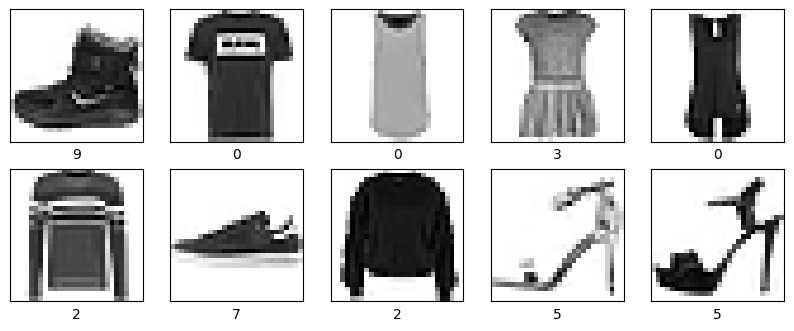

In [27]:
# checking random 10 images from training set
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()



In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense  

**Sequential** : simplest kind of model of NN that are just composed of single stack of layers connected sequentially.

**Input** : Keras needs to know the shape of input instances to determine shape of connection weight matrix.

**Flatten** : Our input is a 2D array. Flatten converts it into a 1D array. 
            [32,28,28] -> [32,784]  ...*(here 32 is the batchsize)*

In [33]:
model = Sequential()

model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()


c:\Users\aarad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

*All global state managed by Keras is stored in a Keras session, which you can clear using
tf.keras.backend.clear_session(). In particular, this resets the name counters.*

In [34]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [37]:
weights , biases = model.layers[1].get_weights()
weights.shape, biases.shape

((784, 300), (300,))

### Why Weights and Biases Are Initialized Without Training:
- Parameter Initialization:

  When you add a layer to your model, Keras automatically initializes the weights and biases for that layer.
  This initialization is necessary because the model needs initial values for the parameters to start the training process.
- Default Initialization:

  - Keras uses default initialization methods for weights and biases:
    - Weights: Typically initialized using methods like **Glorot Uniform** (also known as Xavier initialization) or **He** Normal.
    - Biases: Usually initialized to zeros.
  
  - Purpose of Initialization:

- Proper initialization ensures that the model starts training with reasonable parameter values, preventing issues like exploding or vanishing gradients.

In [38]:
weights

array([[ 0.03049563, -0.07357942,  0.01167807, ...,  0.03250905,
         0.02661244, -0.01656143],
       [-0.06390071,  0.02374867, -0.04751582, ...,  0.05930898,
        -0.03822135, -0.03204246],
       [-0.05579212, -0.01733652, -0.02601911, ...,  0.06680739,
        -0.05080815,  0.06766966],
       ...,
       [ 0.02714276,  0.0070366 ,  0.0052399 , ..., -0.03335149,
        -0.04310855, -0.01829851],
       [-0.06771097, -0.02321954,  0.05028165, ..., -0.02515497,
        -0.06329395,  0.01244454],
       [-0.0097454 ,  0.04627129,  0.02444705, ..., -0.07183593,
         0.01858576,  0.07032025]], dtype=float32)

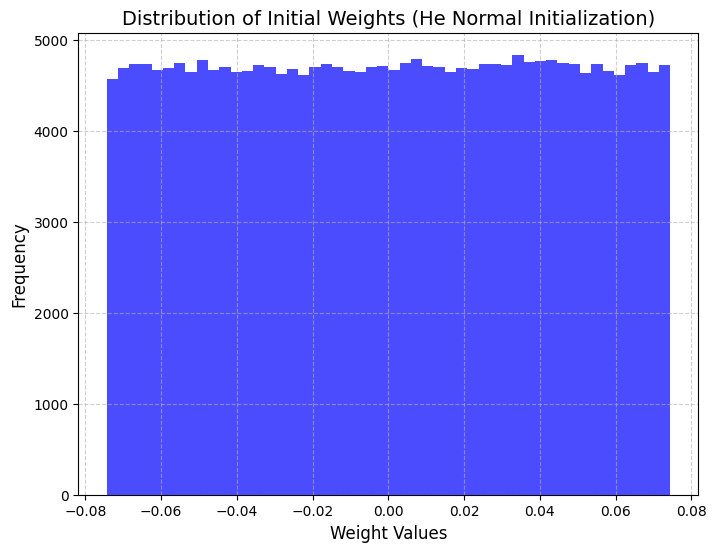

In [41]:
# visualising weights to see the He normal over initialization

flattened_weights = weights.flatten()

# Plot the distribution of weights
plt.figure(figsize=(8, 6))
plt.hist(flattened_weights, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Initial Weights (He Normal Initialization)", fontsize=14)
plt.xlabel("Weight Values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Compiling the model.

1. Loss Function:
   model tries to minimize this while training.
   *generally*:
   - `binary_crossentropy` : binary clf
   - `sparse_categorical_crossentropy` : multi-class clf
   - `mse` : regression

2. Optimizer:
    how weights will be updated based on loss fxn gradients

3. Metrics: 
    evaluate model performance during training.


and other params.
we basically configure the model before putting it to train

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [45]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6705 - loss: 1.0413 - val_accuracy: 0.8167 - val_loss: 0.5369
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8237 - loss: 0.5070 - val_accuracy: 0.8377 - val_loss: 0.4691
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8394 - loss: 0.4531 - val_accuracy: 0.8480 - val_loss: 0.4388
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8495 - loss: 0.4245 - val_accuracy: 0.8538 - val_loss: 0.4192
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8565 - loss: 0.4043 - val_accuracy: 0.8588 - val_loss: 0.4047
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8625 - loss: 0.3879 - val_accuracy: 0.8620 - val_loss: 0.3933
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8669 - loss: 0.3743 - val_accuracy: 0.8653 - val_loss: 0.3841
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8717 - loss: 0.3624 - 

In [48]:
hist = pd.DataFrame(history.history)
hist.head(10), hist.shape

(   accuracy      loss  val_accuracy  val_loss
 0   0.76114  0.739146        0.8167  0.536878
 1   0.82856  0.492374        0.8377  0.469068
 2   0.84188  0.447947        0.8480  0.438834
 3   0.85114  0.421913        0.8538  0.419202
 4   0.85746  0.402414        0.8588  0.404742
 5   0.86324  0.386379        0.8620  0.393305
 6   0.86770  0.372785        0.8653  0.384073
 7   0.87172  0.360917        0.8682  0.376465
 8   0.87546  0.350358        0.8701  0.370248
 9   0.87854  0.340764        0.8704  0.364842,
 (30, 4))

<Figure size 1000x400 with 0 Axes>

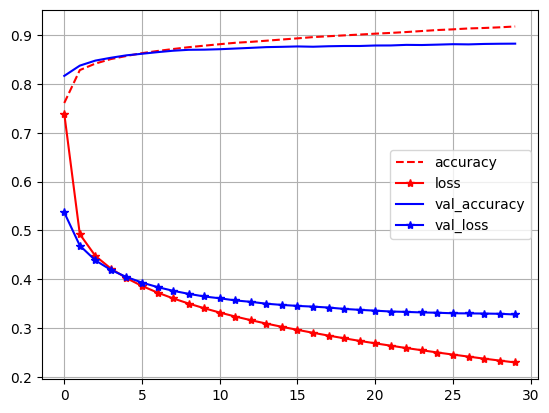

In [63]:
plt.figure(figsize=(10,4))
hist.plot(style=["r--","r-*","b-","b-*"])
plt.grid(True)

Curves going a little further apart over time indicates a some overfitting.
we can see Val loss still going down, it means model hasn't converged yet. call fit() again. Keras starts training again from where it left. 

In [64]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.8722 - loss: 0.3589


[0.35381263494491577, 0.8737000226974487]

# Wide and Deep Neural Network

In [69]:
data = tf.keras.datasets.california_housing.load_data()

(X_train_full, y_train_full), (X_test, y_test) = data

X_train, y_train = X_train_full[:15000], y_train_full[:15000]
X_valid, y_valid = X_train_full[15000:], y_train_full[15000:]
X_train_full.shape, X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 1s 2us/step


((16512, 8), (15000, 8), (1512, 8), (4128, 8), (15000,), (1512,), (4128,))

In [70]:
from tensorflow.keras.layers import Normalization, Concatenate, Input
from tensorflow.keras.models import Model


```mermaid
flowchart TB
    ip["Input Layer"]
    nm["Normalization"]
    h1["Hidden 1"]
    h2["Hidden 2"]
    ct["Concat"]
    op["Output"]

    ip-->nm
    nm-->h1
    h1-->h2
    h2-->ct
    nm-->ct
    ct-->op
```
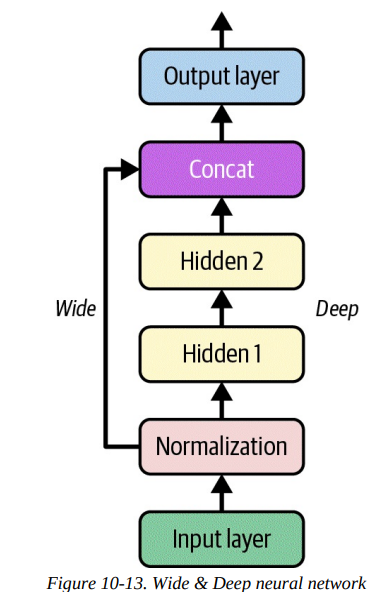

In [72]:
normalization_layer = Normalization()

hl_1 = Dense(30, activation="relu")
hl_2 = Dense(30, activation="relu")

concat_l = Concatenate()
output_l = Dense(1)

input_ = Input(shape=X_train.shape[1:])
norm_ = normalization_layer(input_)

hidden1 = hl_1(norm_)
hidden2 = hl_2(hidden1)
concat = concat_l([norm_, hidden2])
output = output_l(concat)

model = Model(inputs=[input_], outputs=[output])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 8)         │         17 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        270 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30)        │        930 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 38)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         39 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [73]:
model.compile(
    loss="mse",               
    optimizer="adam",         
    metrics=["mae"]           
)

In [74]:
history = model.fit(
    X_train, y_train,          # Training data
    epochs=30,                 # Number of epochs
    validation_data=(X_valid, y_valid)  # Validation data
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 46296621056.0000 - mae: 179555.5469 - val_loss: 26202429440.0000 - val_mae: 119485.2031
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 27618605056.0000 - mae: 118143.9219 - val_loss: 24933746688.0000 - val_mae: 115986.8750
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 26093377536.0000 - mae: 114350.6484 - val_loss: 23106715648.0000 - val_mae: 111120.0859
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 23697313792.0000 - mae: 108541.7812 - val_loss: 20243802112.0000 - val_mae: 103619.7656
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 20251258880.0000 - mae: 100322.2344 - val_loss: 16627041280.0000 - val_mae: 94470.3594
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 16013161472.0000 - mae: 90956.5000 - val_loss: 13228389376.0000 - val_mae: 86518.8359
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 12658310144.0000 - mae: 84062.5312 - val_lo

In [75]:
hist = pd.DataFrame(history.history)
hist.head(10), hist.shape

(           loss            mae      val_loss        val_mae
 0  3.648787e+10  149754.343750  2.620243e+10  119485.203125
 1  2.625629e+10  116619.406250  2.493375e+10  115986.875000
 2  2.469326e+10  112510.484375  2.310672e+10  111120.085938
 3  2.217949e+10  106119.859375  2.024380e+10  103619.765625
 4  1.868040e+10   97564.085938  1.662704e+10   94470.359375
 5  1.473682e+10   88683.531250  1.322839e+10   86518.835938
 6  1.210370e+10   83555.265625  1.170673e+10   83806.156250
 7  1.129851e+10   82715.843750  1.129766e+10   83206.726562
 8  1.107535e+10   82476.695312  1.109578e+10   82727.507812
 9  1.093935e+10   82112.796875  1.094205e+10   82247.039062,
 (30, 4))

<Figure size 1000x400 with 0 Axes>

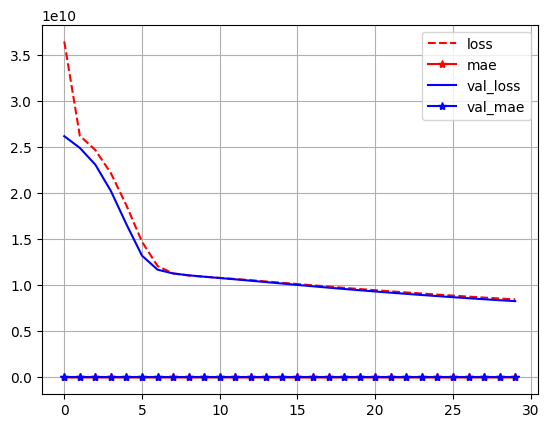

In [76]:
plt.figure(figsize=(10,4))
hist.plot(style=["r--","r-*","b-","b-*"])
plt.grid(True)

## Another model

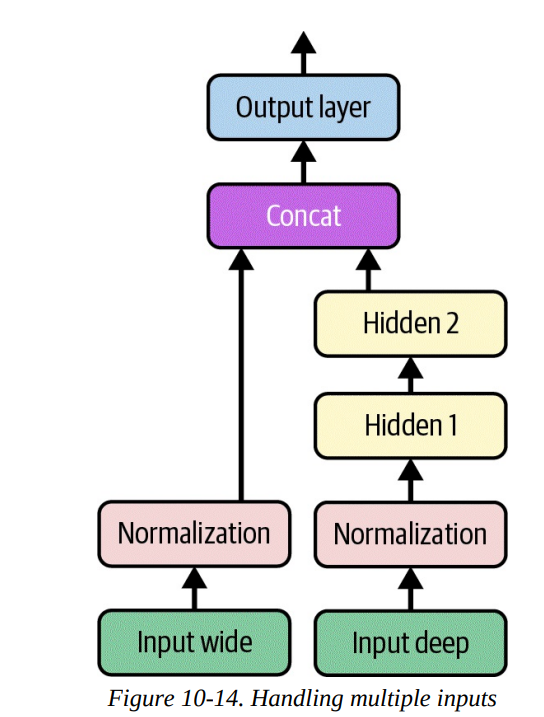

In [77]:
input_wide = Input(shape=[5])  # feat 0-4
input_deep = Input(shape=[6])  # feat 2-7

norm_l_wide = Normalization()
norm_l_deep = Normalization()

norm_wide = norm_l_wide(input_wide)
norm_deep = norm_l_deep(input_deep)

hidden1 = Dense(30, activation="relu")(norm_deep)
hidden2 = Dense(30, activation="relu")(hidden1)

concat = Concatenate()([norm_wide, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_wide, input_deep], outputs=[output])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 6)         │         13 │ input_layer_4[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 30)        │        210 │ normalization_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 5)         │         11 │ input_layer_3[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 30)        │        930 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 35)        │          0 │ normalization_2[… │
│ (Concatenate)       │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         36 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [78]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss="mse",
    optimizer=optimizer,
    metrics=["RootMeanSquaredError"]
)

In [79]:
# modelling data to fit the above model

X_train_wide,X_train_deep  = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]



In [81]:
norm_l_deep.adapt(X_train_deep)
norm_l_wide.adapt(X_train_wide)
history = model.fit((X_train_wide, X_train_deep),y_train,
                    epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep),y_valid))

mse_test = model.evaluate((X_test_wide,X_test_deep),y_test)
mse_test

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - RootMeanSquaredError: 86098.8516 - loss: 7418183680.0000 - val_RootMeanSquaredError: 80816.0234 - val_loss: 6531229696.0000
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - RootMeanSquaredError: 83941.1875 - loss: 7049879040.0000 - val_RootMeanSquaredError: 79423.6562 - val_loss: 6308117504.0000
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - RootMeanSquaredError: 82047.5000 - loss: 6734304256.0000 - val_RootMeanSquaredError: 78338.5078 - val_loss: 6136921600.0000
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - RootMeanSquaredError: 80480.9922 - loss: 6478706176.0000 - val_RootMeanSquaredError: 77579.0391 - val_loss: 6018507776.0000
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - RootMeanSquaredError: 79280.5938 - loss: 6286248448.0000 - val_RootMeanSquaredError: 77072.7188 - val_loss: 5940204032.0000
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - RootMeanSquaredError: 78404.1562 - loss: 614

[5854485504.0, 76514.609375]